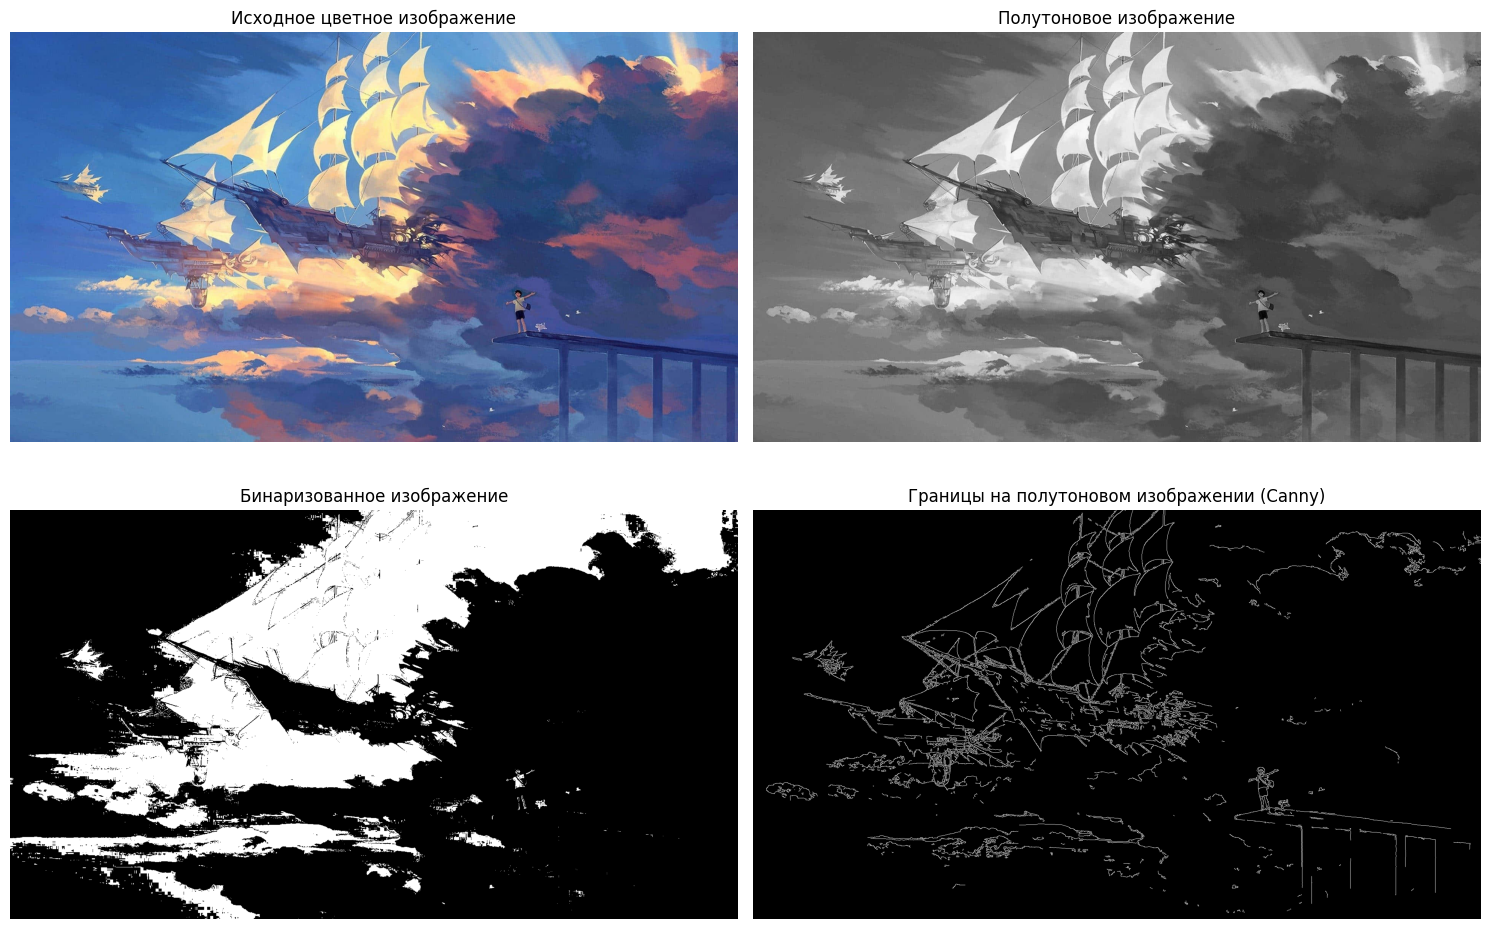

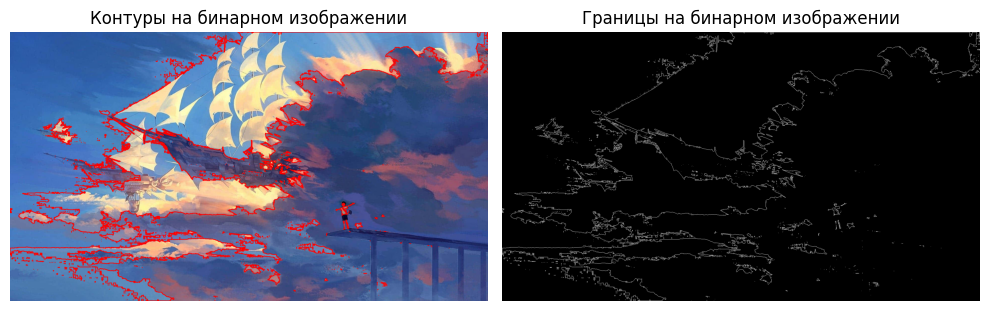

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка цветного изображения
image_path = '../images/IMG_20130818_081052.jpg'
color_image = cv2.imread(image_path)

# Проверка успешности загрузки изображения
if color_image is None:
    raise FileNotFoundError(f"Изображение по пути {image_path} не найдено.")

# Конвертация цветной модели BGR в RGB для корректного отображения
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Преобразование цветного изображения в полутоновое (оттенки серого)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Применение бинаризации с использованием порога (например, 127)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Визуализация исходных изображений
plt.figure(figsize=(15, 10))

# Отображение исходного цветного изображения
plt.subplot(2, 2, 1)
plt.imshow(color_image_rgb)
plt.title('Исходное цветное изображение')
plt.axis('off')

# Отображение полутонового изображения
plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Полутоновое изображение')
plt.axis('off')

# Отображение бинаризованного изображения
plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Бинаризованное изображение')
plt.axis('off')

# Выделение границ на полутоновом изображении с использованием алгоритма Canny
edges_canny = cv2.Canny(gray_image, 100, 200)

# Выделение границ на бинарном изображении с использованием поиска контуров
# Метод RETR_EXTERNAL извлекает только внешние контуры
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
binary_with_contours = color_image_rgb.copy()
cv2.drawContours(binary_with_contours, contours, -1, (255, 0, 0), 2)  # Рисуем контуры красным цветом

# Отображение границ на полутоновом изображении
plt.subplot(2, 2, 4)
plt.imshow(edges_canny, cmap='gray')
plt.title('Границы на полутоновом изображении (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Визуализация контуров на бинарном изображении
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(binary_with_contours)
plt.title('Контуры на бинарном изображении')
plt.axis('off')

# Альтернативный метод отображения границ с использованием контуров
binary_edges = np.zeros_like(binary_image)
cv2.drawContours(binary_edges, contours, -1, 255, 1)

plt.subplot(1, 2, 2)
plt.imshow(binary_edges, cmap='gray')
plt.title('Границы на бинарном изображении')
plt.axis('off')

plt.tight_layout()
plt.show()